In [31]:
import numpy as np
import matplotlib.pyplot as plt
# import matplotlib as mpl

In [3]:
%matplotlib inline

In [4]:
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('notebook')

In [5]:
### Variable definitions for hubble constant, effective potential, etc...
ho = 72.5
N_eff = 3.04
O_gamma = (2.469e-5)
h = ho/100.0

In [95]:
### Choose one of the models below
### ov is a given dark energy constant, and om is a given matter constant
### NCr is a constant used to nullify a parametric density for certain models, i.e. Omega_rad * NCr

# model, om, ov, NCr, NCk = 'Einstein de-Sitter', 1.0, 0.0, 0.0, 1.0
# model, om, ov, NCr, NCk = 'Low Density', .05, 0.0, 1.0, 1.0
# model, om, ov, NCr, NCk = 'High Lambda', 0.2, 0.8, 1.0, (0.)
model, om, ov, NCr, NCk = 'High Lambda Modified', 0.3, 0.7, 1.0, (0.)
### model, om, ov, NCr, NCk = 'Other model', 0.2, 0.8, 1.0, (0.)
### model, om, ov, NCr, NCk = 'other model', 0.2, 0.8, 1.0, (0.)

In [101]:
### Defining linear space for plotting
z = np.linspace(0,4000,50) 
print (z)

[   0.           81.63265306  163.26530612  244.89795918  326.53061224
  408.16326531  489.79591837  571.42857143  653.06122449  734.69387755
  816.32653061  897.95918367  979.59183673 1061.2244898  1142.85714286
 1224.48979592 1306.12244898 1387.75510204 1469.3877551  1551.02040816
 1632.65306122 1714.28571429 1795.91836735 1877.55102041 1959.18367347
 2040.81632653 2122.44897959 2204.08163265 2285.71428571 2367.34693878
 2448.97959184 2530.6122449  2612.24489796 2693.87755102 2775.51020408
 2857.14285714 2938.7755102  3020.40816327 3102.04081633 3183.67346939
 3265.30612245 3346.93877551 3428.57142857 3510.20408163 3591.83673469
 3673.46938776 3755.10204082 3836.73469388 3918.36734694 4000.        ]


In [121]:
### Defining Functions
def OM(z, om):
    return om * (1.0 + z)**3.0

### OR returns the z dependent radiation function, O_R is the radiation density constant
O_R = NCr * O_gamma * (1.0 / (h**2.0)) * (1.0 + (0.2271)*N_eff)
# print (O_R)
def OR(z, ho):
    return O_R * (1 + z)**4.0

### Ok returns the z dependent curvature function, O_k is the curvature density constant, 
def Ok(z, om, ov, ho):
    O_k = 1 - om - ov - O_R
    return NCk * O_k * (1 + z)**2.0

### O_de returns the input value of the dark energy density,
def O_de(z, ov):
    lamd = []
    for x in z:
        lamd.append(ov)
    return lamd

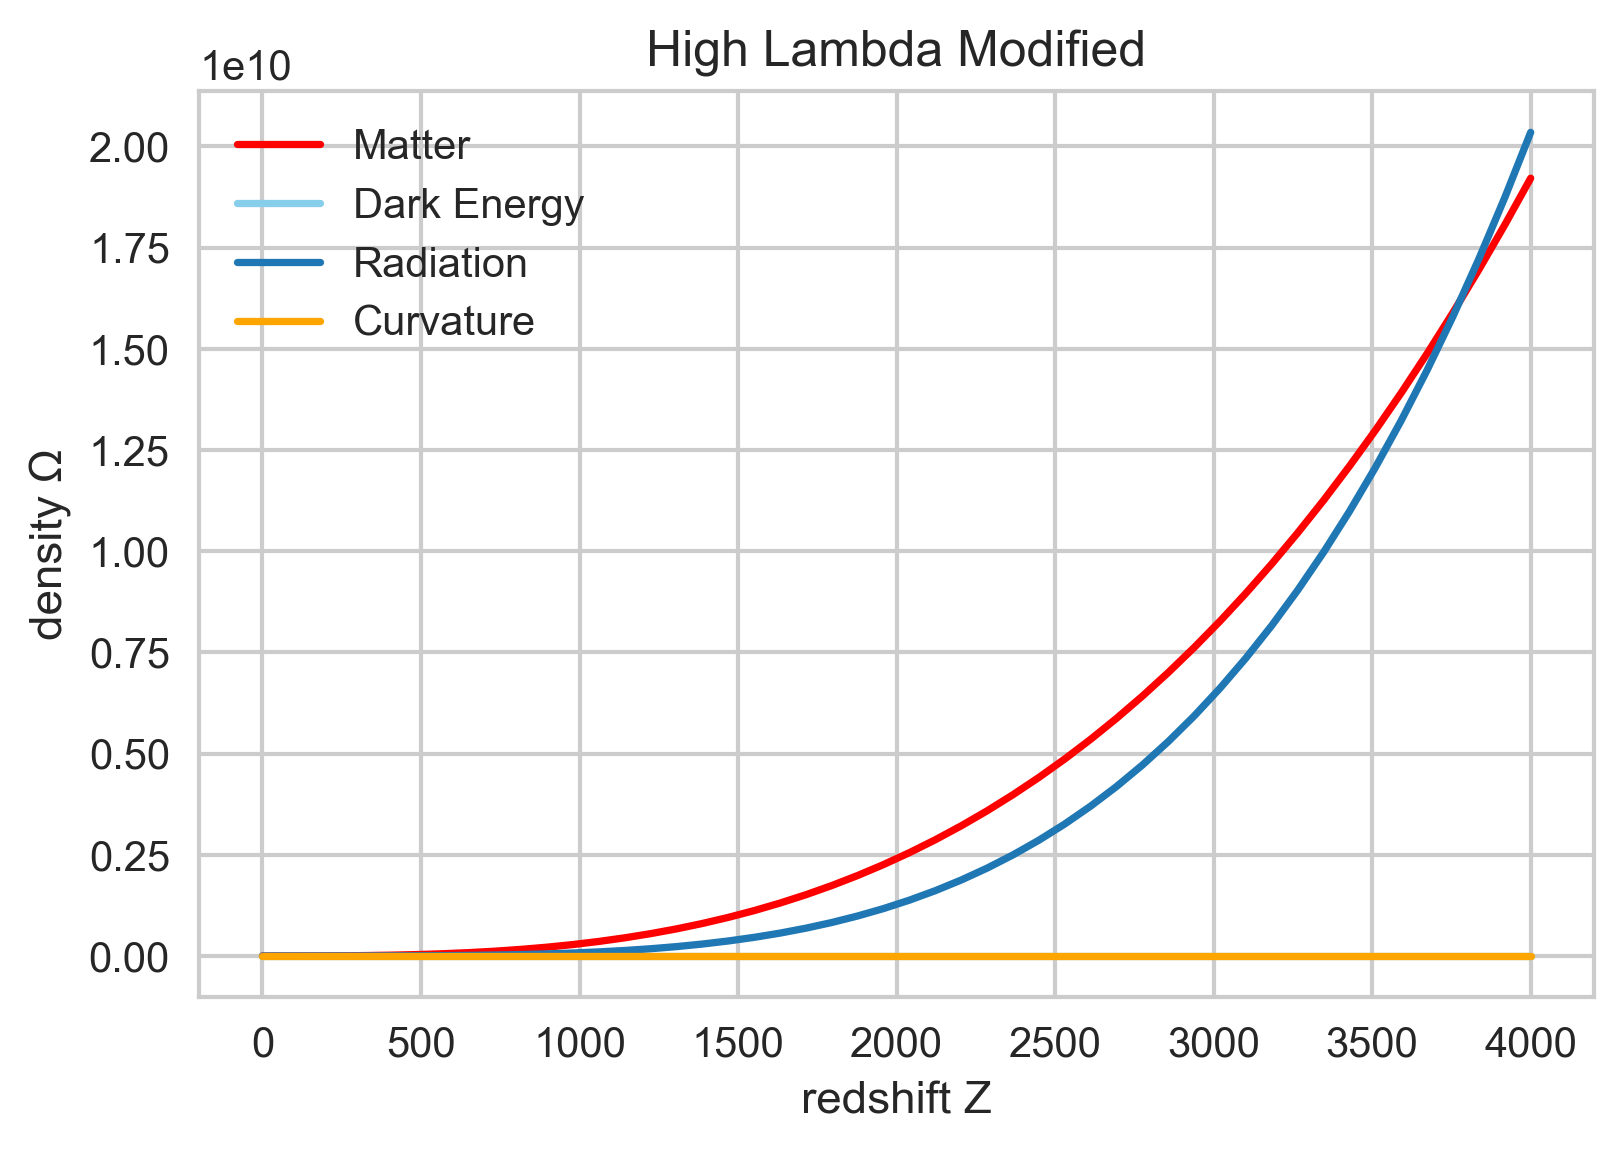

In [110]:
z = np.linspace(0,4000,50) 

matter = OM(z, om)
curvature = Ok(z, om, ov, O_R)
radiation = OR(z, ho)
dark_e = O_de(z, ov)

plt.plot(z, matter, label = 'Matter', color = 'r')
plt.plot(z, dark_e, label = 'Dark Energy', color = 'skyblue')
plt.plot(z, radiation, label = 'Radiation')
plt.plot(z, curvature, label = 'Curvature', color = 'orange')

plt.legend()
plt.ylabel('density Ω')
plt.xlabel('redshift Z')
plt.title(model)

import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['figure.dpi'] = 300

In [122]:
### Calculate where matter and radiation densities intersect
(om/O_R) - 1

3777.2509880749008

Text(0.5,0,'redshift Z')

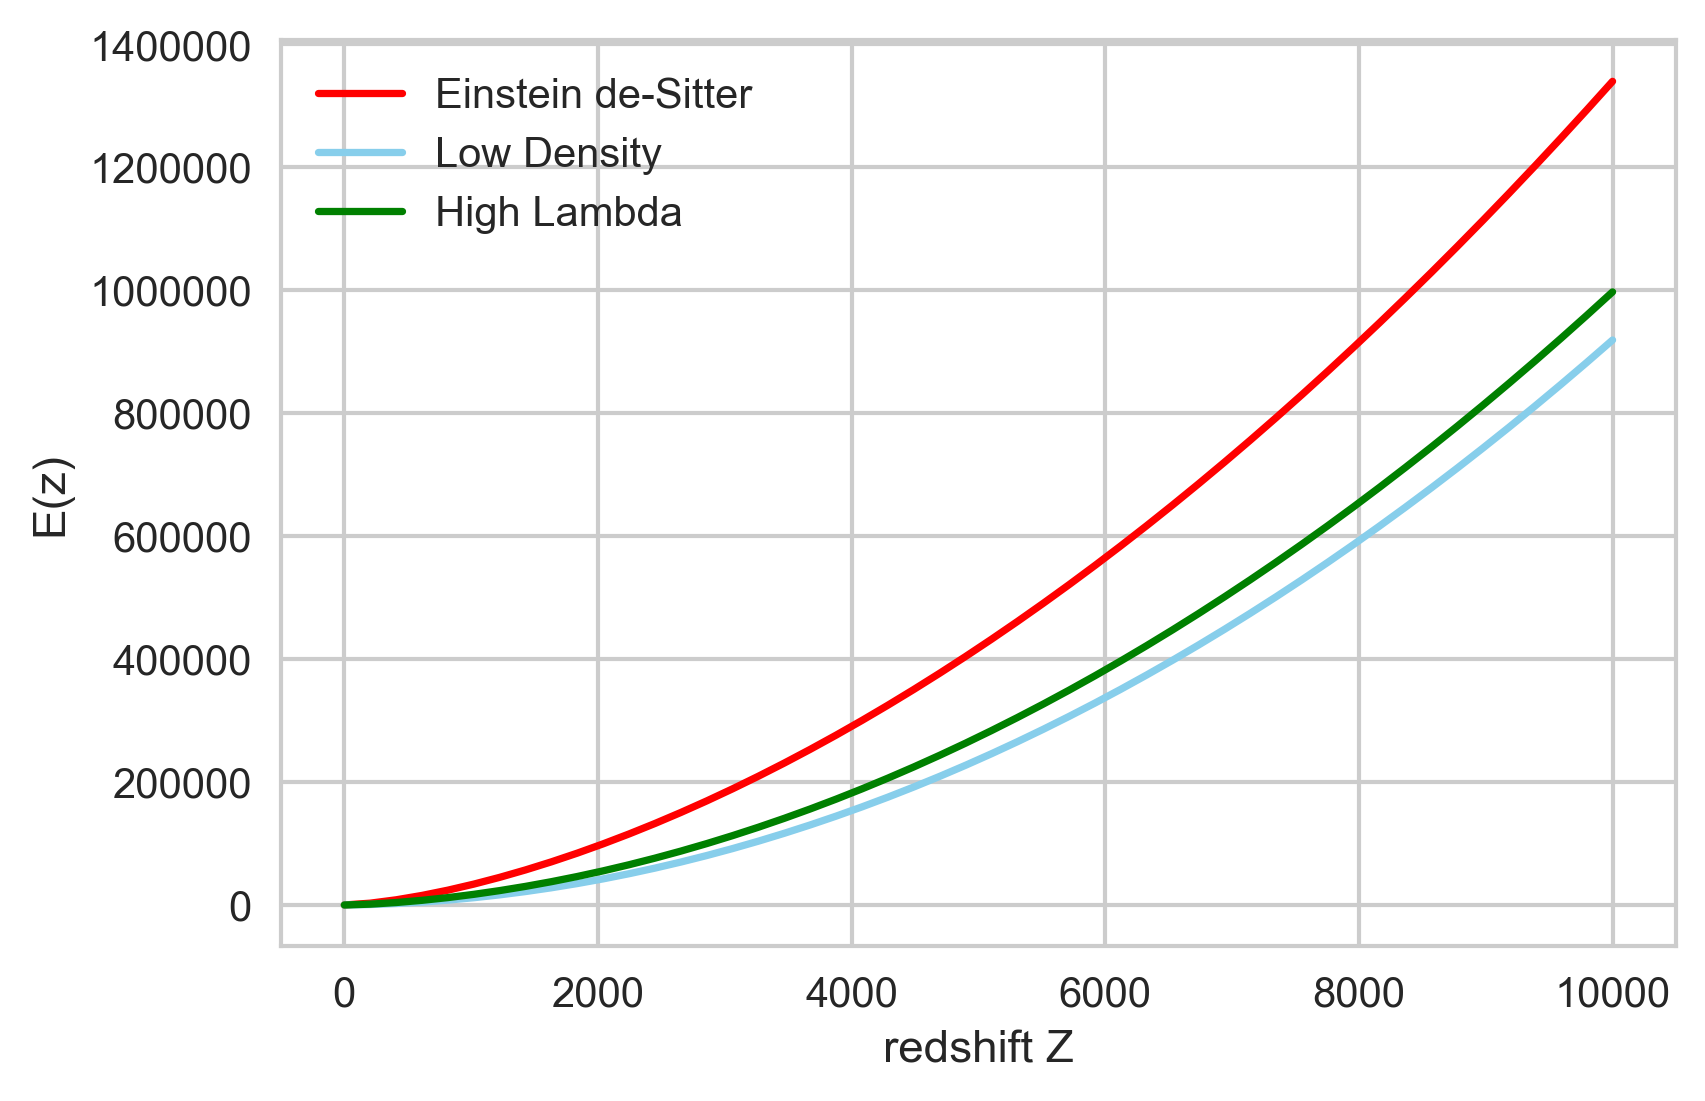

In [84]:
### Defining E(z) for different models and plotting them together
z = np.linspace(0,10000,50) 

def Ez1(z, ho):
    model, om, ov, NCr, NCk = 'Einstein de-Sitter', 1.0, 0.0, 0.0, 1.0
    matter = OM(z, om)
    radiation = OR(z, ho)
    curvature = Ok(z, om, ov, O_R)
    dark_energy = O_de(z, ov)
    
    E1_squared = matter + radiation + curvature + dark_energy
    return np.sqrt(E1_squared)

def Ez2(z, ho):
    model, om, ov, NCr, NCk = 'Low Density', .05, 0.0, 1.0, 1.0
    matter = OM(z, om)
    radiation = OR(z, ho)
    curvature = Ok(z, om, ov, O_R)
    dark_energy = O_de(z, ov)
    
    E2_squared = matter + radiation + curvature + dark_energy
    return np.sqrt(E2_squared)

def Ez3(z, ho):
    model, om, ov, NCr, NCk = 'High Lambda', 0.2, 0.8, 1.0, (0.)
    matter = OM(z, om)
    radiation = OR(z, ho)
    curvature = Ok(z, om, ov, O_R)
    dark_energy = O_de(z, ov)
    
    E_squared = matter + radiation + curvature + dark_energy
    return np.sqrt(E_squared)

ez1 = Ez1(z, ho)
ez2 = Ez2(z, ho)
ez3 = Ez3(z, ho)

plt.plot(z, ez1, label = 'Einstein de-Sitter', color = 'r')
plt.plot(z, ez2, label = 'Low Density', color = 'skyblue')
plt.plot(z, ez3, label = 'High Lambda', color = 'g')

plt.legend()
plt.ylabel('E(z)')
plt.xlabel('redshift Z')
# plt.title('')

In [ ]:
def luminosity_distance():
    